## ПОДГОТОВКА ДАННЫХ

In [72]:
import random
import numpy as np
import matplotlib.pyplot as plt

n = 100

PE_marks = [4, 8, 20] 
PS_marks = [1, 2, 4] 
PB_marks = [1, 5, 10] 
PFCF_marks = [10, 20, 30] 
ROE_marks = [30, 20, 5] 
ROA_marks = [20, 15, 5] 
ROS_marks = [30, 12, 5] 

intervals = [0, 0.2, 0.7, 1]
interval_good = intervals[3] - intervals[2]
interval_normal = intervals[2] - intervals[1]
interval_bad = intervals[1] - intervals[0]

PE_K_res = np.zeros(n) 
PS_K_res = np.zeros(n) 
PB_K_res = np.zeros(n) 
PFCF_K_res = np.zeros(n) 
ROE_K_res = np.zeros(n) 
ROA_K_res = np.zeros(n) 
ROS_K_res = np.zeros(n)

X = np.zeros((n,7))
y = np.zeros(n)

PE_arr = np.zeros(n) 
PS_arr = np.zeros(n) 
PB_arr = np.zeros(n)
PFCF_arr = np.zeros(n)
ROE_arr = np.zeros(n)
ROA_arr = np.zeros(n)
ROS_arr = np.zeros(n)

def calc_P_K(num, marksArr, index, resArr):
    if(num < 1) :
        resArr[i] = round(intervals[2] + (1/(num*10) - 1/(marksArr[0]*10)) * interval_good / (intervals[3] - 1/(marksArr[0]*10)), 2)
    elif(num <= marksArr[0]) :
        resArr[i] = round(intervals[2] + (1/num - 1/marksArr[0]) * interval_good / (intervals[3] - 1/marksArr[0]), 2)
    elif (num <= marksArr[1]) :
        resArr[i] = round(intervals[1] + (marksArr[0]*(1/num - 1/marksArr[1])) * interval_normal / (intervals[3] - marksArr[0]/marksArr[1]), 2)
    else :
        resArr[i] = round(intervals[0] + (marksArr[1]*(1/num - 1/marksArr[2])) * interval_bad / (intervals[3] - marksArr[1]/marksArr[2]), 2)
    return resArr[i]

def calc_RO_K(num, marksArr, index, resArr):
    if(num >= marksArr[1]) :
        resArr[i] = round(intervals[2] + interval_good * (num/marksArr[0] - marksArr[1]/marksArr[0]) / (intervals[3] - marksArr[1]/marksArr[0]), 2)
    elif (num >= marksArr[2]) :
        resArr[i] = round(intervals[1] + interval_normal * (num/marksArr[1] - marksArr[2]/marksArr[1]) / (intervals[3] - marksArr[2]/marksArr[1]), 2)
    else :
        resArr[i] = round(intervals[0] + interval_bad * (num/marksArr[2] - 1/marksArr[2]) / (intervals[3] - 1/marksArr[2]), 2)
    return resArr[i]


for i in range (n) :
    PE_arr[i] = round(random.uniform(1, PE_marks[2]), 2)
    PS_arr[i] = round(random.uniform(0.1, PS_marks[2]), 2)
    PB_arr[i] = round(random.uniform(0.1, PB_marks[2]), 2)
    PFCF_arr[i] = round(random.uniform(1, PFCF_marks[2]), 2)
    ROE_arr[i] = round(random.uniform(1, ROE_marks[0]), 2) # 1/n
    ROA_arr[i] = round(random.uniform(1, ROA_marks[0]), 2) # 1/n
    ROS_arr[i] = round(random.uniform(1, ROS_marks[0]), 2) # 1/n
    
    PE_K = calc_P_K(PE_arr[i], PE_marks, i, PE_K_res)
    PS_K = calc_P_K(PS_arr[i], PS_marks, i, PS_K_res)
    PB_K = calc_P_K(PB_arr[i], PB_marks, i, PB_K_res)
    PFCF_K = calc_P_K(PFCF_arr[i], PFCF_marks, i, PFCF_K_res)
    ROE_K = calc_RO_K(ROE_arr[i], ROE_marks, i, ROE_K_res)
    ROA_K = calc_RO_K(ROA_arr[i], ROA_marks, i, ROA_K_res)
    ROS_K = calc_RO_K(ROS_arr[i], ROS_marks, i, ROS_K_res)
    
    X[i] = [PE_arr[i], PS_arr[i], PB_arr[i], PFCF_arr[i], ROE_arr[i], ROA_arr[i], ROS_arr[i]]
    y[i] = (PE_K + PS_K + PB_K + PFCF_K + ROE_K + ROA_K + ROS_K)/7

y = np.reshape(y, (n,1))

X_train = X[0:69]
X_test = X[70:99]
y_train = y[0:69]
y_test = y[70:99]


'''
print('======================PE=====================')
print(PE_arr)
print(PE_K_res)
print('======================PS=====================')
print(PS_arr)
print(PS_K_res)
print('======================PB=====================')
print(PB_arr)
print(PB_K_res)
print('======================PFCF=====================')
print(PFCF_arr)
print(PFCF_K_res)
print('======================ROE=====================')
print(ROE_arr)
print(ROE_K_res)
print('======================ROA=====================')
print(ROA_arr)
print(ROA_K_res)
print('======================ROS=====================')
print(ROS_arr)
print(ROS_K_res)
'''
print(X_train)
print(y_train)
print(X_test)
print(y_test)



[[13.39  3.41  5.89 10.73 13.86  2.78 29.58]
 [15.1   2.62  4.43 23.15 24.72 16.68 16.4 ]
 [ 9.73  2.55  0.54 15.76 15.81  1.54  8.18]
 [11.38  1.45  0.96 12.98 18.17  4.89  1.59]
 [10.63  0.81  1.02 24.3  22.12  6.24 13.23]
 [12.83  1.37  8.52 16.95 11.57  8.6  10.09]
 [12.91  2.59  0.82 19.83 24.71  6.3  21.45]
 [16.78  1.59  8.68 21.67 25.94 17.4   2.56]
 [ 1.8   1.6   3.65 23.27  5.19  9.58  9.57]
 [10.81  2.5   5.98 12.36 22.15  4.71 12.69]
 [11.84  2.95  1.75 18.8   9.95  2.52 18.65]
 [ 9.91  1.65  5.33  4.04 11.96 16.91 22.52]
 [11.81  3.37  0.94 12.15 23.87 17.64  7.64]
 [18.53  2.95  0.26  2.24 12.56 17.11 29.46]
 [16.79  2.31  6.23 13.09 15.51 11.21 21.81]
 [11.17  2.82  8.39 13.69  4.77  1.27 14.8 ]
 [ 7.36  2.37  7.43 14.62 17.91 11.4  13.76]
 [19.76  0.62  9.21 26.69 22.03  9.98 22.64]
 [17.79  1.03  5.03  8.57 19.78  2.72 17.95]
 [ 5.81  1.2   7.84  1.04  2.64 14.42  6.18]
 [11.51  2.58  0.44 13.57 20.02  3.3  15.8 ]
 [17.75  1.1   7.25 28.5   2.45  7.7   3.77]
 [16.43  1

## ОБУЧЕНИЕ

In [73]:
def ReLU(x):
  return np.maximum(0, x)

def d_ReLU(x):
  return np.where(x >= 0, 1, 0)

def predict(input, weights_0_1, weights_1_2):
  layer_0 = input
  layer_1 = np.dot(layer_0, weights_0_1)
  layer_2 = np.dot(layer_1, weights_1_2)
  return layer_2

np.random.seed(1)

learning_rate = 0.0000001
hidden_size = 20
input_size = 7
epochs = 50000
p = 0.5

weights_0_1 = 2*np.random.random((input_size,hidden_size))
weights_1_2 = 2*np.random.random((hidden_size, 1))

error_arr = []
accuracy_arr = []

for epoch in range(epochs):
  error = 0

  input_layer = X_train
  goal_prediction = y_train
  hidden_layer = ReLU(np.dot(input_layer, weights_0_1))
  
  mask = np.random.binomial(size=hidden_layer.shape, n=1, p=p)
  hidden_layer = hidden_layer * mask
  hidden_layer = hidden_layer * 1/(1 - p)
  
  output_layer = np.dot(hidden_layer, weights_1_2)
  
  error += (output_layer - goal_prediction) ** 2
  error_arr.append(error.mean())

  derivative = 2*(output_layer - goal_prediction)

  weight_corrections_1_2 = hidden_layer.T.dot(derivative)
  weight_corrections_0_1 = input_layer.T.dot(derivative.dot(weights_1_2.T) * d_ReLU(hidden_layer) * mask * 1/(1 - p)) 

  weights_0_1 = weights_0_1 - learning_rate * weight_corrections_0_1
  weights_1_2 = weights_1_2 - learning_rate * weight_corrections_1_2

Error: 1516180.2949707487
Error: 627972.4196870385
Error: 74262.38159735205
Error: 12323.400129213902
Error: 8076.9401514084375
Error: 11222.91858204517
Error: 6329.968580421934
Error: 5735.797741997258
Error: 6744.109829822605
Error: 7289.55820007352
Error: 4712.580236920177
Error: 5215.819734760496
Error: 4662.286384341462
Error: 3383.768920557891
Error: 3540.7150034609103
Error: 3372.5576098494957
Error: 2699.9988463684917
Error: 2819.356870194491
Error: 3795.250316586729
Error: 3860.951603485171
Error: 2248.067495301986
Error: 2540.2341452845076
Error: 2589.693446630518
Error: 1842.8063467802049
Error: 1694.3742558536217
Error: 2016.337284541281
Error: 1384.8900946543636
Error: 1775.3710579640067
Error: 1495.5098334452725
Error: 962.0702565687378
Error: 1379.0675962479754
Error: 1029.231814732375
Error: 1168.1041025539175
Error: 1474.9396167009686
Error: 932.5607833335553
Error: 864.3878240684695
Error: 843.0670332616734
Error: 953.901366321371
Error: 905.2570446398636
Error: 813.5

In [74]:
prediction = predict(X_test, weights_0_1, weights_1_2)
print(((prediction - y_test)**2).mean())

0.010595435513695696


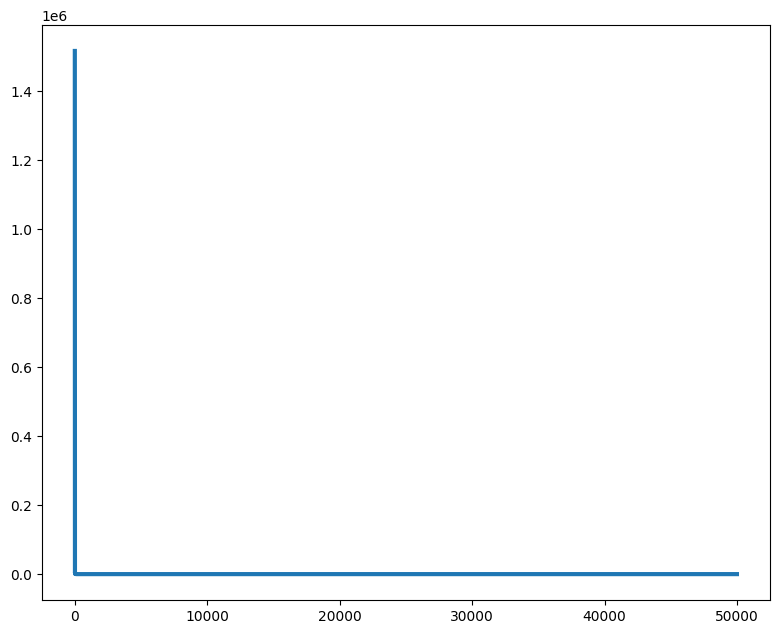

In [75]:
fig = plt.figure(figsize=(15, 12), constrained_layout=True)
ax1 = fig.add_subplot(221)
ax1.plot(np.arange(len(error_arr)), error_arr, linewidth = 3)

# ТЕСТИРОВАНИЕ НА РЕАЛЬНЫХ ДАННЫХ

In [76]:
SurgutNefteGaz = [0.95, 0.87, 0.24, 7.3, 25.49, 22.73, 91.77]
Bashneft = [1.87, 0.19, 0.29, 6.1, 15.28, 9.27, 10.05]
Gazprom = [3.09, 0.35, 0.25, 8.86, 7.98, 5.02, 8.05]
VarieganNefteGaz = [2.84, 0.79, 0.74, 2.23, 26.04, 15.93, 27.74]
Alrosa = [4.79, 1.41, 1.4, 5.79, 29.33, 18.96, 29.53]
Lukoil = [3.95, 0.62, 0.74, 4.94, 14.3, 18.73, 15.68]

In [77]:
company_names = ['СургутНефтеГаз', 'Башнефть', 'Газпром', 'ВарьеганНефтеГаз', 'Алроса', 'Лукойл']
X_val = [SurgutNefteGaz, Bashneft, Gazprom, VarieganNefteGaz, Alrosa, Lukoil]

for i in range (len(X_val)):
    prediction = predict(X_val[i], weights_0_1, weights_1_2)
    print('Коэфициент ' + company_names[i] + ': ' + str(prediction[0]))

Коэфициент СургутНефтеГаз: 0.8071662042699422
Коэфициент Башнефть: 0.23408906382963268
Коэфициент Газпром: 0.17036120654435044
Коэфициент ВарьеганНефтеГаз: 0.42538555309301823
Коэфициент Алроса: 0.5036998570809033
Коэфициент Лукойл: 0.3320167350906362
